## LIBRARIES REQUIRED

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Datasets/Online Retail.csv')

In [3]:
df.shape

(541909, 8)

In [4]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/10 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01/12/10 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01/12/10 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01/12/10 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01/12/10 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01/12/10 8:34,1.69,13047.0,United Kingdom


## Recency Frequency Monetary - RFM
RECENCY =  How recent a customer have visited or purchased from  the store

FREQUENCY = How often a customer have visited or have puraches from the store

MONETARY = How much money a customer have spent in total at the store

## CALCULATING MONETARY

In [29]:
df = df[df['Quantity'] > 0]

In [30]:
df.shape

(531285, 10)

Quantity purchased * unit price of a commodity = total money spent

In [31]:
df['sales'] = df['Quantity'] * df['UnitPrice']

In [32]:
df['sales']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: sales, Length: 531285, dtype: float64

In [33]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,697 days 08:53:00
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,697 days 08:53:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00


In [34]:
monetary = df.groupby('CustomerID')['sales'].sum() 
## groups the data customer ID and sales i.e., combining data of same customer ID and adding up the total 
## sale/purchase made by them

In [35]:
monetary

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2094.88
18287.0     1837.28
Name: sales, Length: 4339, dtype: float64

In [36]:
monetary.shape

(4339,)

In [37]:
monetary = monetary.reset_index()

In [38]:
monetary.shape

(4339, 2)

In [39]:
monetary

,CustomerID,sales
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


## CALCULATING FREQUENCY

In [40]:
frequency = df.groupby('CustomerID')['InvoiceNo'].count()
## invoice no. or the bill no. how many time a bill or invoice hass been generated for a particular Cutomer ID
## is added up and then grouped. Therefore, the number of invoices generated will be equal to the frequency or
## the number of times a customer have visited and made purchase from the store

In [41]:
frequency

CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     12
18283.0    756
18287.0     70
Name: InvoiceNo, Length: 4339, dtype: int64

In [42]:
frequency.shape

(4339,)

In [43]:
frequency = frequency.reset_index()

In [44]:
frequency.shape

(4339, 2)

In [45]:
frequency

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype          
---  ------       --------------   -----          
 0   InvoiceNo    531285 non-null  object         
 1   StockCode    531285 non-null  object         
 2   Description  530693 non-null  object         
 3   Quantity     531285 non-null  int64          
 4   InvoiceDate  531285 non-null  datetime64[ns] 
 5   UnitPrice    531285 non-null  float64        
 6   CustomerID   397924 non-null  float64        
 7   Country      531285 non-null  object         
 8   sales        531285 non-null  float64        
 9   Diff         531285 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4), timedelta64[ns](1)
memory usage: 44.6+ MB


## CALCULATING RECENCY

In [47]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
## changing date-time format

In [48]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,697 days 08:53:00
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,697 days 08:53:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00


In [49]:
maximum = max(df['InvoiceDate']) ## maximum of we can the latest purchased made from the store

In [50]:
maximum

Timestamp('2011-12-10 17:19:00')

In [51]:
maximum = maximum + pd.DateOffset(days = 1)

In [52]:
df['Diff'] = maximum - df['InvoiceDate'] 
## finding out how many days past a customer have vivited the store

In [53]:
df['Diff']

0        698 days 08:53:00
1        698 days 08:53:00
2        698 days 08:53:00
3        698 days 08:53:00
4        698 days 08:53:00
                ...       
541904    90 days 04:29:00
541905    90 days 04:29:00
541906    90 days 04:29:00
541907    90 days 04:29:00
541908    90 days 04:29:00
Name: Diff, Length: 531285, dtype: timedelta64[ns]

In [54]:
recency = df.groupby('CustomerID')['Diff'].min()

In [55]:
recency

CustomerID
12346.0   327 days 07:18:00
12347.0    41 days 04:54:00
12348.0    77 days 04:06:00
12349.0    20 days 07:28:00
12350.0   312 days 01:18:00
                 ...       
18280.0   161 days 07:27:00
18281.0     5 days 06:26:00
18282.0   217 days 03:44:00
18283.0    11 days 04:20:00
18287.0     1 days 06:56:00
Name: Diff, Length: 4339, dtype: timedelta64[ns]

In [56]:
recency = recency.reset_index()

In [57]:
recency['Diff'] = recency['Diff'].dt.days

In [58]:
recency

,CustomerID,Diff
0,12346.0,327
1,12347.0,41
2,12348.0,77
3,12349.0,20
4,12350.0,312
...,...,...
4334,18280.0,161
4335,18281.0,5
4336,18282.0,217
4337,18283.0,11


## MERGING THE DATA AND CREATING A NEW DATASET

In [59]:
master = recency.merge(frequency, on = 'CustomerID')

In [60]:
master

,CustomerID,Diff,InvoiceNo
0,12346.0,327,1
1,12347.0,41,182
2,12348.0,77,31
3,12349.0,20,73
4,12350.0,312,17
...,...,...,...
4334,18280.0,161,10
4335,18281.0,5,7
4336,18282.0,217,12
4337,18283.0,11,756


In [61]:
RFM = master.merge(monetary, on = 'CustomerID')
RFM.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [62]:
RFM

,CustomerID,Recency,Frequency,Monetary
0,12346.0,327,1,77183.60
1,12347.0,41,182,4310.00
2,12348.0,77,31,1797.24
3,12349.0,20,73,1757.55
4,12350.0,312,17,334.40
...,...,...,...,...
4334,18280.0,161,10,180.60
4335,18281.0,5,7,80.82
4336,18282.0,217,12,178.05
4337,18283.0,11,756,2094.88


## PREPROCESSING THE DATA FOR ANALYSIS

In [63]:
scaler = MinMaxScaler()
data = scaler.fit_transform(RFM[['Recency', 'Frequency', 'Monetary']])

In [64]:
data

array([[0.46771879, 0.        , 0.27545304],
       [0.05738881, 0.02306908, 0.01538154],
       [0.10903874, 0.0038236 , 0.00641399],
       ...,
       [0.30989957, 0.00140199, 0.00063543],
       [0.0143472 , 0.09622738, 0.00747621],
       [0.        , 0.00879429, 0.00655689]])

## CREATING ELBOW TO FIND WHAT NUMBER OF CLUSTERS GIVE WHAT RESULTS

In [43]:
SSE = []
k = list(range(1,21))

In [44]:
for i in k:
    model = KMeans( n_clusters = i )
    ypred = model.fit_predict(data)
    SSE.append(model.inertia_)

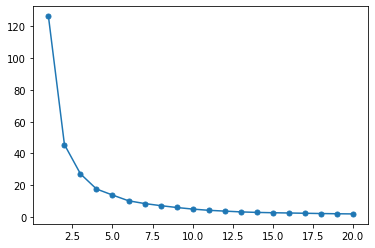

In [45]:
plt.plot(k,SSE, marker = 'o', ms = 5)
plt.show()

The graph above shows the SSE(sum squared error) plotted against the k value the lower the value of inertia the better. From the above graph value 5 is the most sutiable

In [65]:
MB = KMeans(n_clusters = 5)
Cluster_id = MB.fit_predict(data)

In [66]:
Cluster_id

array([1, 0, 0, ..., 1, 0, 0])

In [67]:
RFM['Cluster_id'] = Cluster_id

In [68]:
RFM

,CustomerID,Recency,Frequency,Monetary,Cluster_id
0,12346.0,327,1,77183.60,1
1,12347.0,41,182,4310.00,0
2,12348.0,77,31,1797.24,0
3,12349.0,20,73,1757.55,0
4,12350.0,312,17,334.40,1
...,...,...,...,...,...
4334,18280.0,161,10,180.60,2
4335,18281.0,5,7,80.82,0
4336,18282.0,217,12,178.05,1
4337,18283.0,11,756,2094.88,0


In [69]:
mean_recency = RFM.groupby('Cluster_id')['Recency'].mean()
mean_frequency = RFM.groupby('Cluster_id')['Frequency'].mean()
mean_monetary = RFM.groupby('Cluster_id')['Monetary'].mean()

In [70]:
cid = pd.Series([0,1,2,3,4])
newdf = pd.concat([cid,mean_recency,mean_frequency,mean_monetary], axis = 1)
newdf.columns = ['Cluster_id', 'Recency', 'Frequency', 'Monetary']
newdf

,Cluster_id,Recency,Frequency,Monetary
0,0,34.574704,113.459305,2298.861457
1,1,278.597615,27.599106,559.960790
2,2,145.271784,49.135892,886.054680
3,3,596.824324,23.743243,349.446486
4,4,13.230769,2566.000000,126118.310000


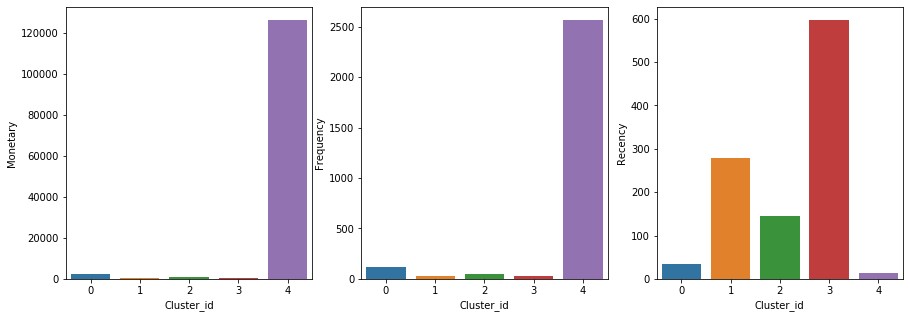

In [71]:
fig,axes = plt.subplots(1,3, figsize = (15,5))
sns.barplot(x = newdf['Cluster_id'], y = newdf['Monetary'], ax = axes[0])
sns.barplot(x = newdf['Cluster_id'], y = newdf['Frequency'], ax = axes[1])
sns.barplot(x = newdf['Cluster_id'], y = newdf['Recency'], ax = axes[2])
plt.show()

The graphs depicting above represents Monetary, Frequency and Recency plotted against Cluster ID. 5 cluster ID denotes 5 type of customers that are clustered together on the basis of different characterstics